Here I will do a first batch of visualizations useful for the `covid19_stats.engine.gis` documentation, which lives under [here](https://tanimislam.github.io/covid19_stats/api/api.html#covid19-stats-engine-gis-module).

Step \#1 are the proper imports. I confess I haven't looked at the low-level documentation in a *long long* (over 6 months) time!

In [43]:
import os, sys, numpy, pylab,importlib, pickle, gzip
from covid19_stats.engine import core, gis, viz
from covid19_stats import COVID19Database
from matplotlib.patches import Polygon
from itertools import chain
from nprstuff.core import autocrop_image
%matplotlib inline

The `COVID19Database` singleton object, and the location of the `gis` subdirectory for SPHINX docstring documentation.

In [37]:
cdat = COVID19Database( )
static_gis_dir = '../docsrc/source/_static/gis'
assert( os.path.isdir( static_gis_dir ))

Get the [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) codes for counties in the [Sacramento, CA, MSA](https://en.wikipedia.org/wiki/Sacramento,_California).

/usr/WS2/islam5/covid19_stats/covid19_stats/engine/viz.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(
/usr/WS2/islam5/covid19_stats/covid19_stats/engine/viz.py:57: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.fillcontinents( lake_color = cblue, color = 'white' )


FileNotFoundError: [Errno 2] No such file or directory: '../docsrc/source/_static/gis/gis_calculate_total_bbox_sacramento.pkl.gz/wb'

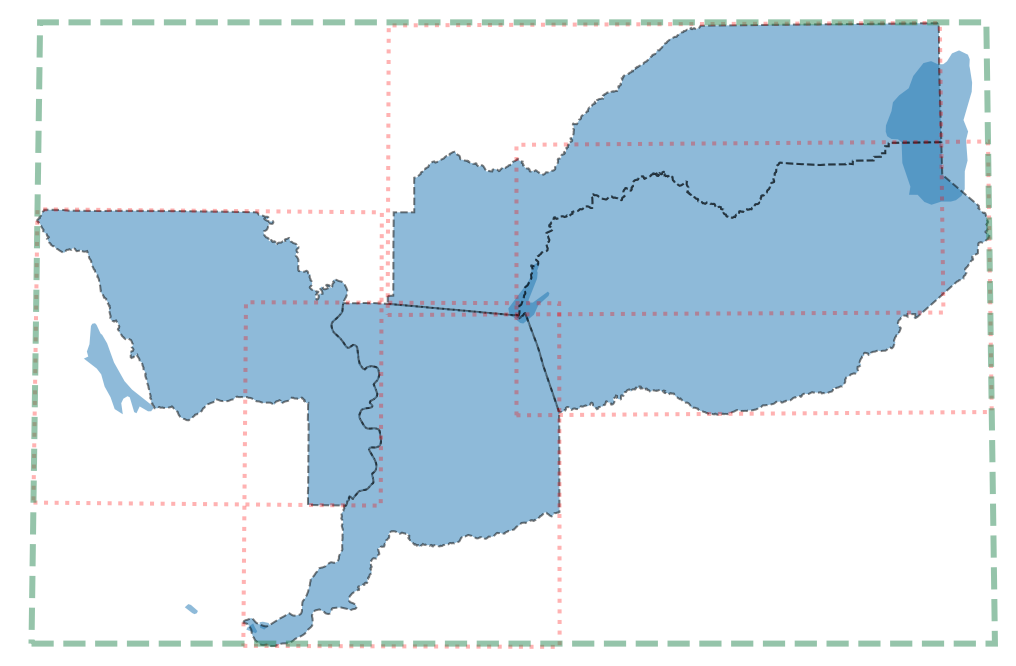

In [45]:
importlib.reload( viz )
fips_sacto_ca = cdat.data_msas_2019()['sacramento']['fips']
fig = pylab.figure()
fig.set_size_inches([18,12])
ax = fig.add_subplot(111)
m = viz.display_fips( fips_sacto_ca, ax, resolution = 'h',
                     drawGrid = False, river_alpha = 0.0, coast_alpha = 0.0 )
for patch in ax.patches:
    patch.set_alpha( 0.5 )
for idx in range(len( ax.texts)):
    ax.texts.pop( )
ax.set_axis_off( )
#
## now create the pink boundaries of ALL the FIPS regions here
bdict = core.get_boundary_dict( fips_sacto_ca )
def create_boundary_for_shape( shapes ):
    lng_min, lat_min, lng_max, lat_max = gis.calculate_total_bbox( shapes )
    return numpy.array((
        (lng_min, lat_min), (lng_max, lat_min), (lng_max, lat_max), (lng_min, lat_max)))
#
## now create pink boundaries for ALL shapes in the region
for coll_of_shapes in bdict.values():
    bdry_shape = create_boundary_for_shape( coll_of_shapes )
    x, y = m(bdry_shape[:,0], bdry_shape[:,1])
    poly = Polygon( numpy.array([ x, y ]).T, closed = True,
                   edgecolor = 'red', linewidth = 4.0, linestyle = 'dotted', facecolor = None, alpha = 0.3 )
    #
    ## because bug in Polygon, facecolor not really set
    poly._facecolor = (0,0,0,0.0)
    ax.add_patch( poly )
#
## now the big-ass border
big_bdry_shape = create_boundary_for_shape( chain.from_iterable( bdict.values()))
x, y = m(big_bdry_shape[:,0], big_bdry_shape[:,1])
poly = Polygon( numpy.array([x, y]).T, closed=True, edgecolor = 'seagreen', linewidth = 6.0, linestyle = 'dashed',
               alpha = 0.5 )
poly._facecolor = (0.0,0,0,0)
ax.add_patch( poly )
#
## now save to static GIS subdirectory, so that can save the image
fig.savefig( os.path.join( static_gis_dir, 'gis_calculate_total_bbox_sacramento.png'), bbox_inches = 'tight')
autocrop_image.autocrop_image( os.path.join( static_gis_dir, 'gis_calculate_total_bbox_sacramento.png') )
#
## now push out the demonstration shapes into pkl.gz
pickle.dump( list( chain.from_iterable(bdict.values() )),
            gzip.open( os.path.join( static_gis_dir, 'gis_calculate_total_bbox_sacramento.pkl.gz', 'wb' ) ) )

In [42]:
len( list(chain.from_iterable(bdict.values() )))

4